# Scan 1 Analysis

439 imaj tarandı.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("results.csv")
# df = pd.read_csv("totalscan.csv")
df = df.drop_duplicates()
df.columns

Index(['scanner', 'imagetype', 'image', 'id', 'pkgname', 'pkgversion',
       'severity', 'score'],
      dtype='object')

## High DPI Settings

In [3]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

<Axes: xlabel='scanner', ylabel='count'>

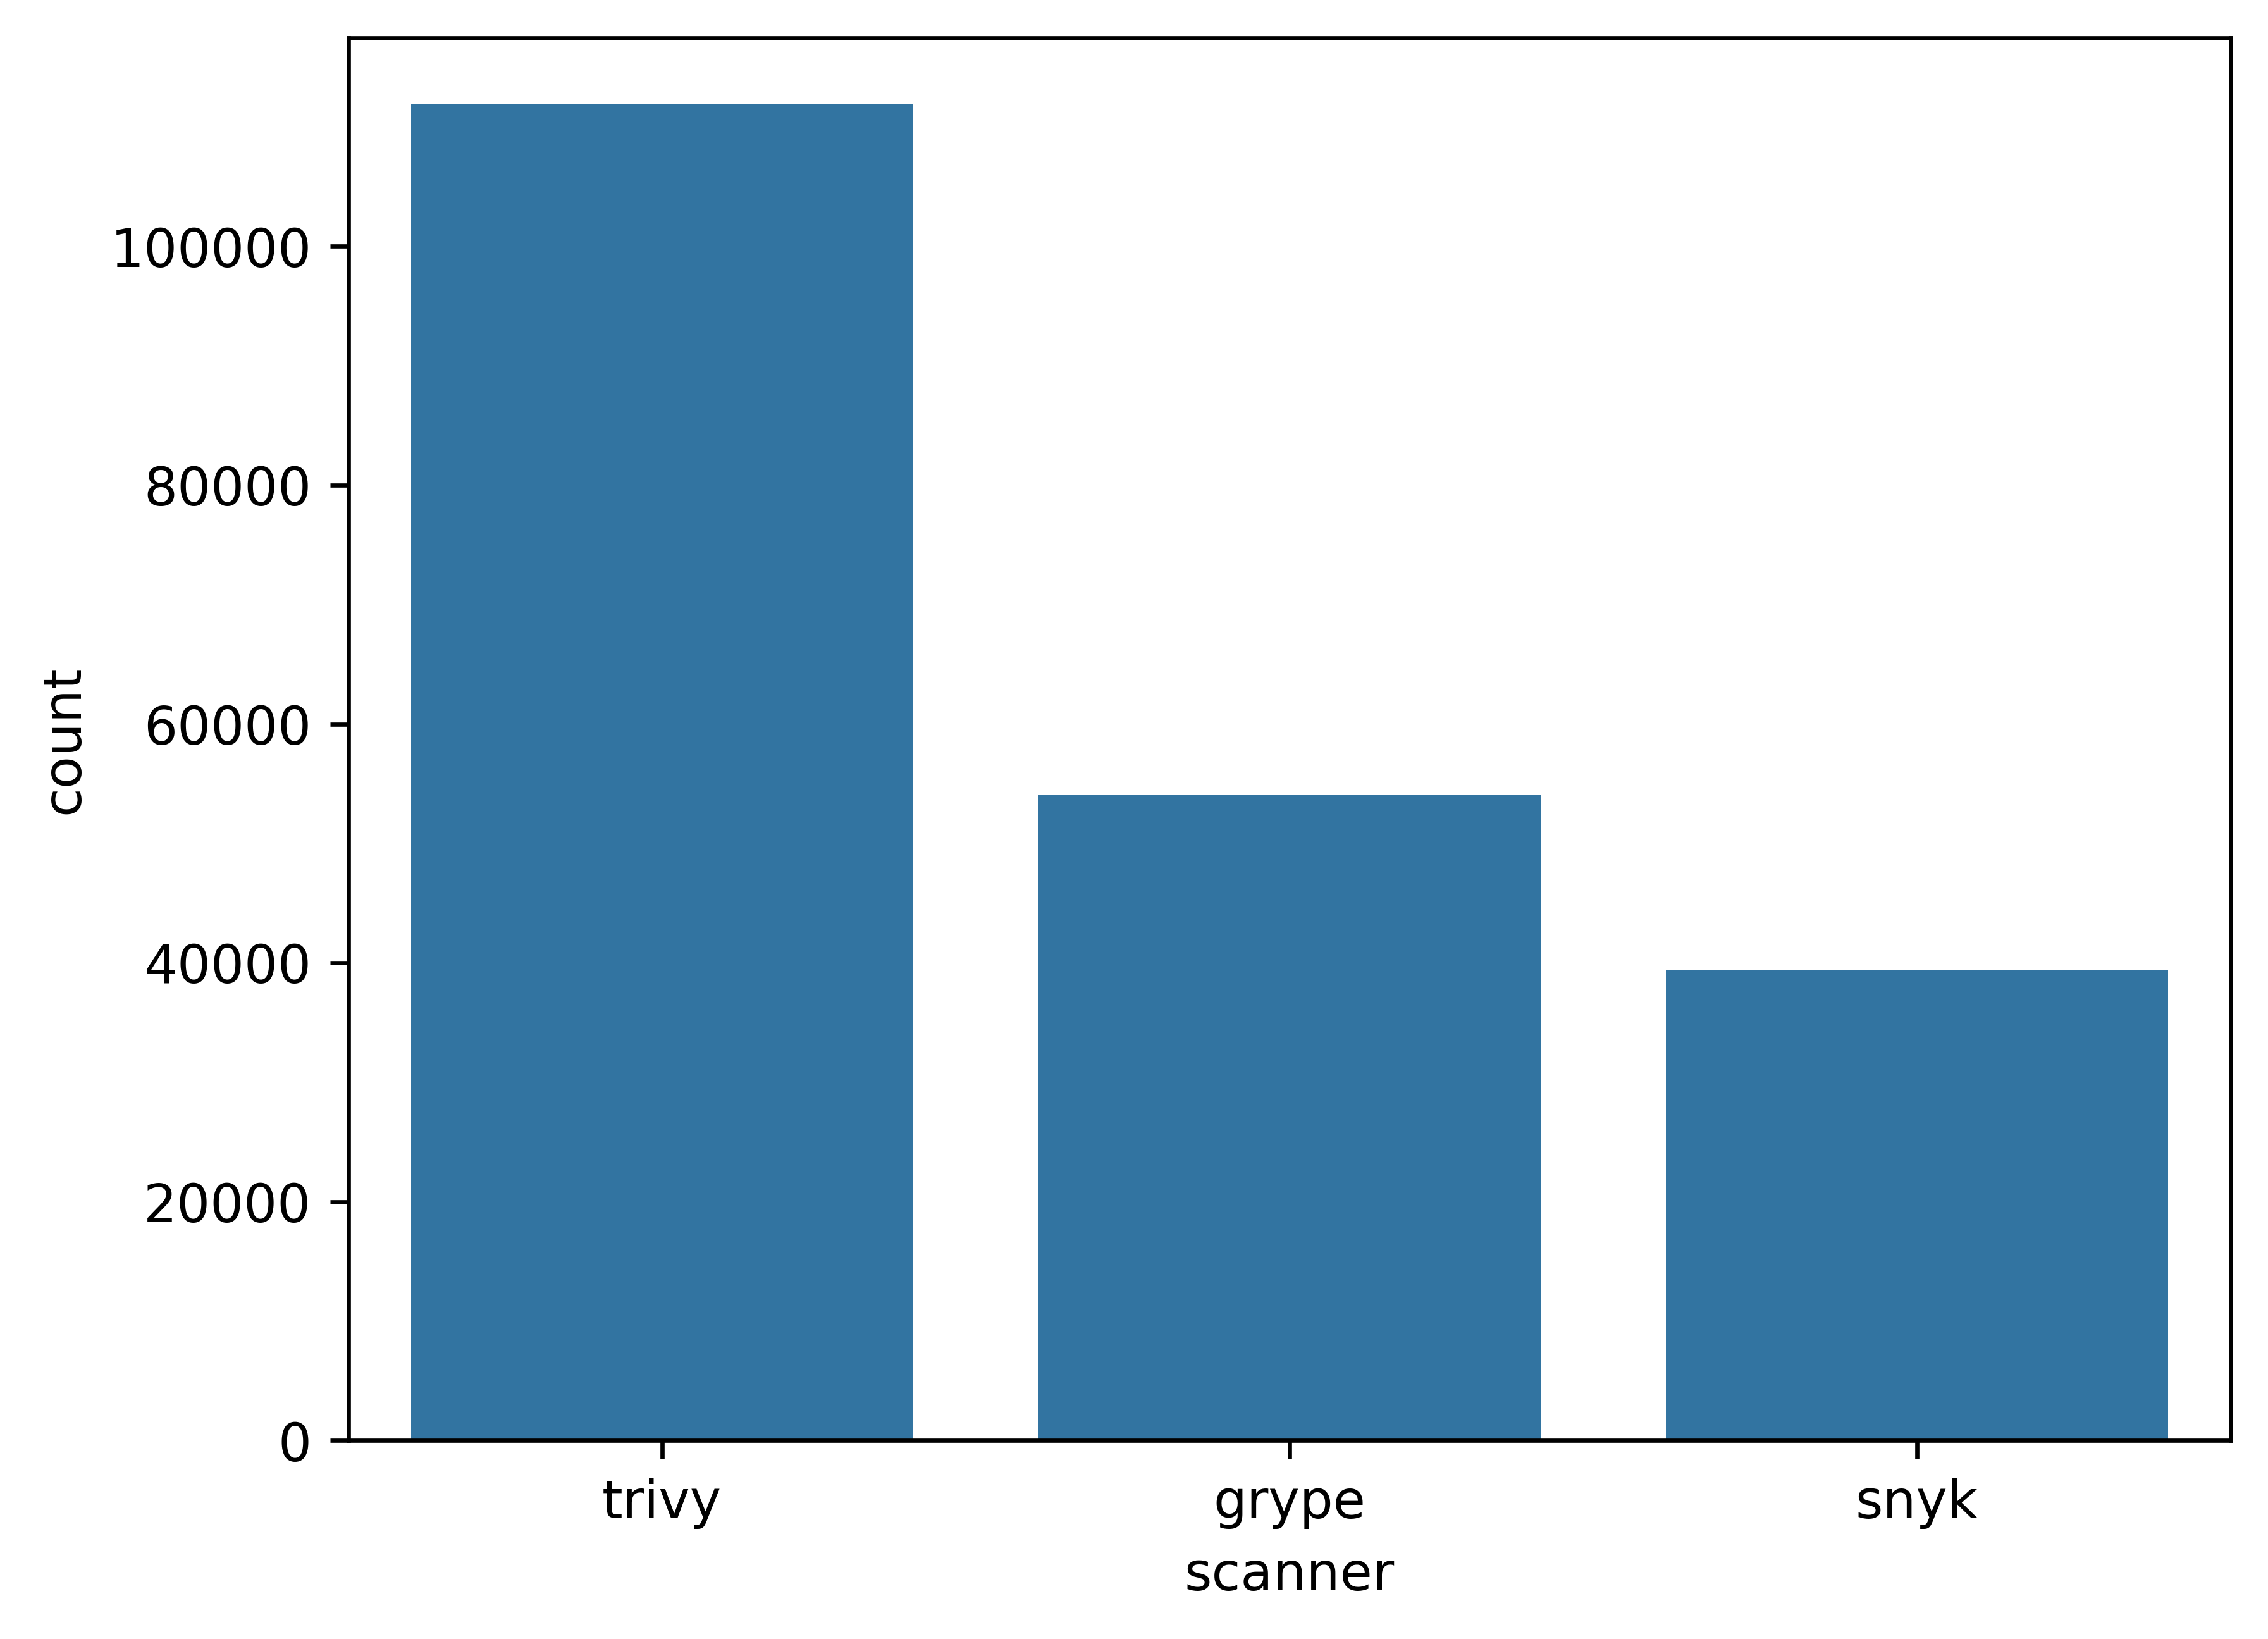

In [4]:
sns.countplot(df, x="scanner")

# İmaj Türüne Göre

resmi imaj sayısı fazla olduğunu unutma!

<Axes: xlabel='imagetype', ylabel='count'>

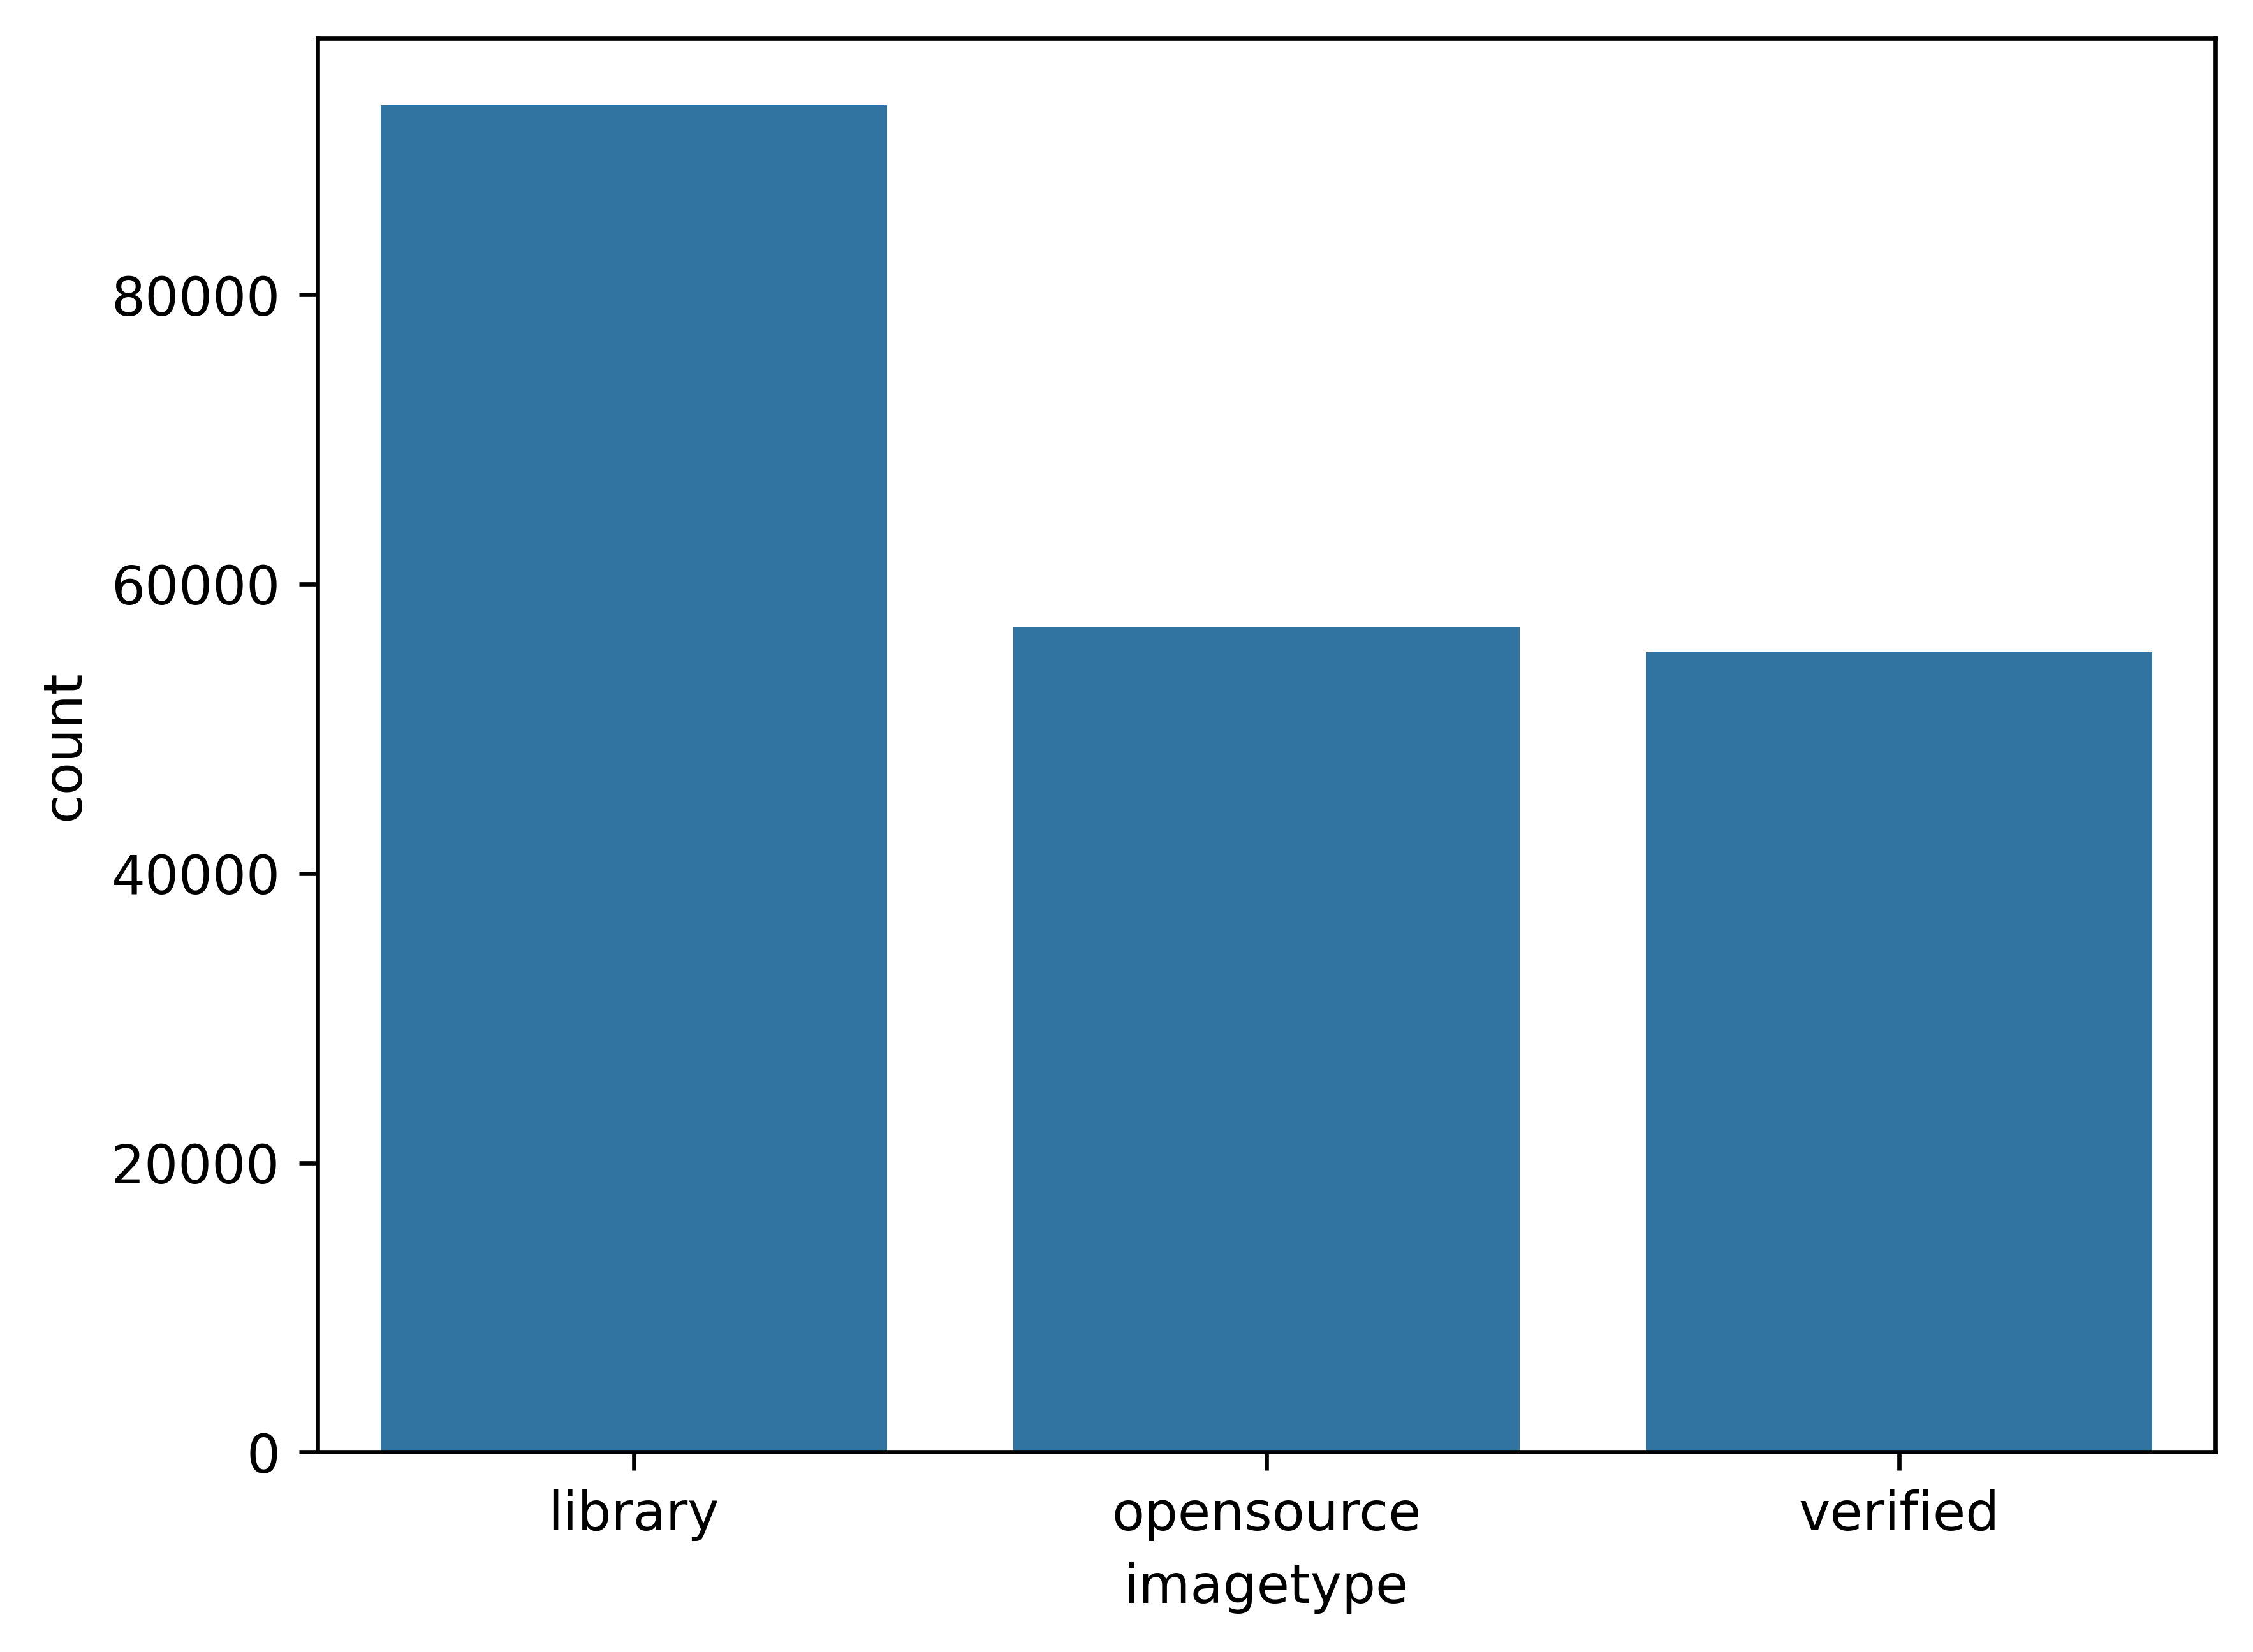

In [5]:
sns.countplot(df, x="imagetype")

<Axes: xlabel='scanner', ylabel='count'>

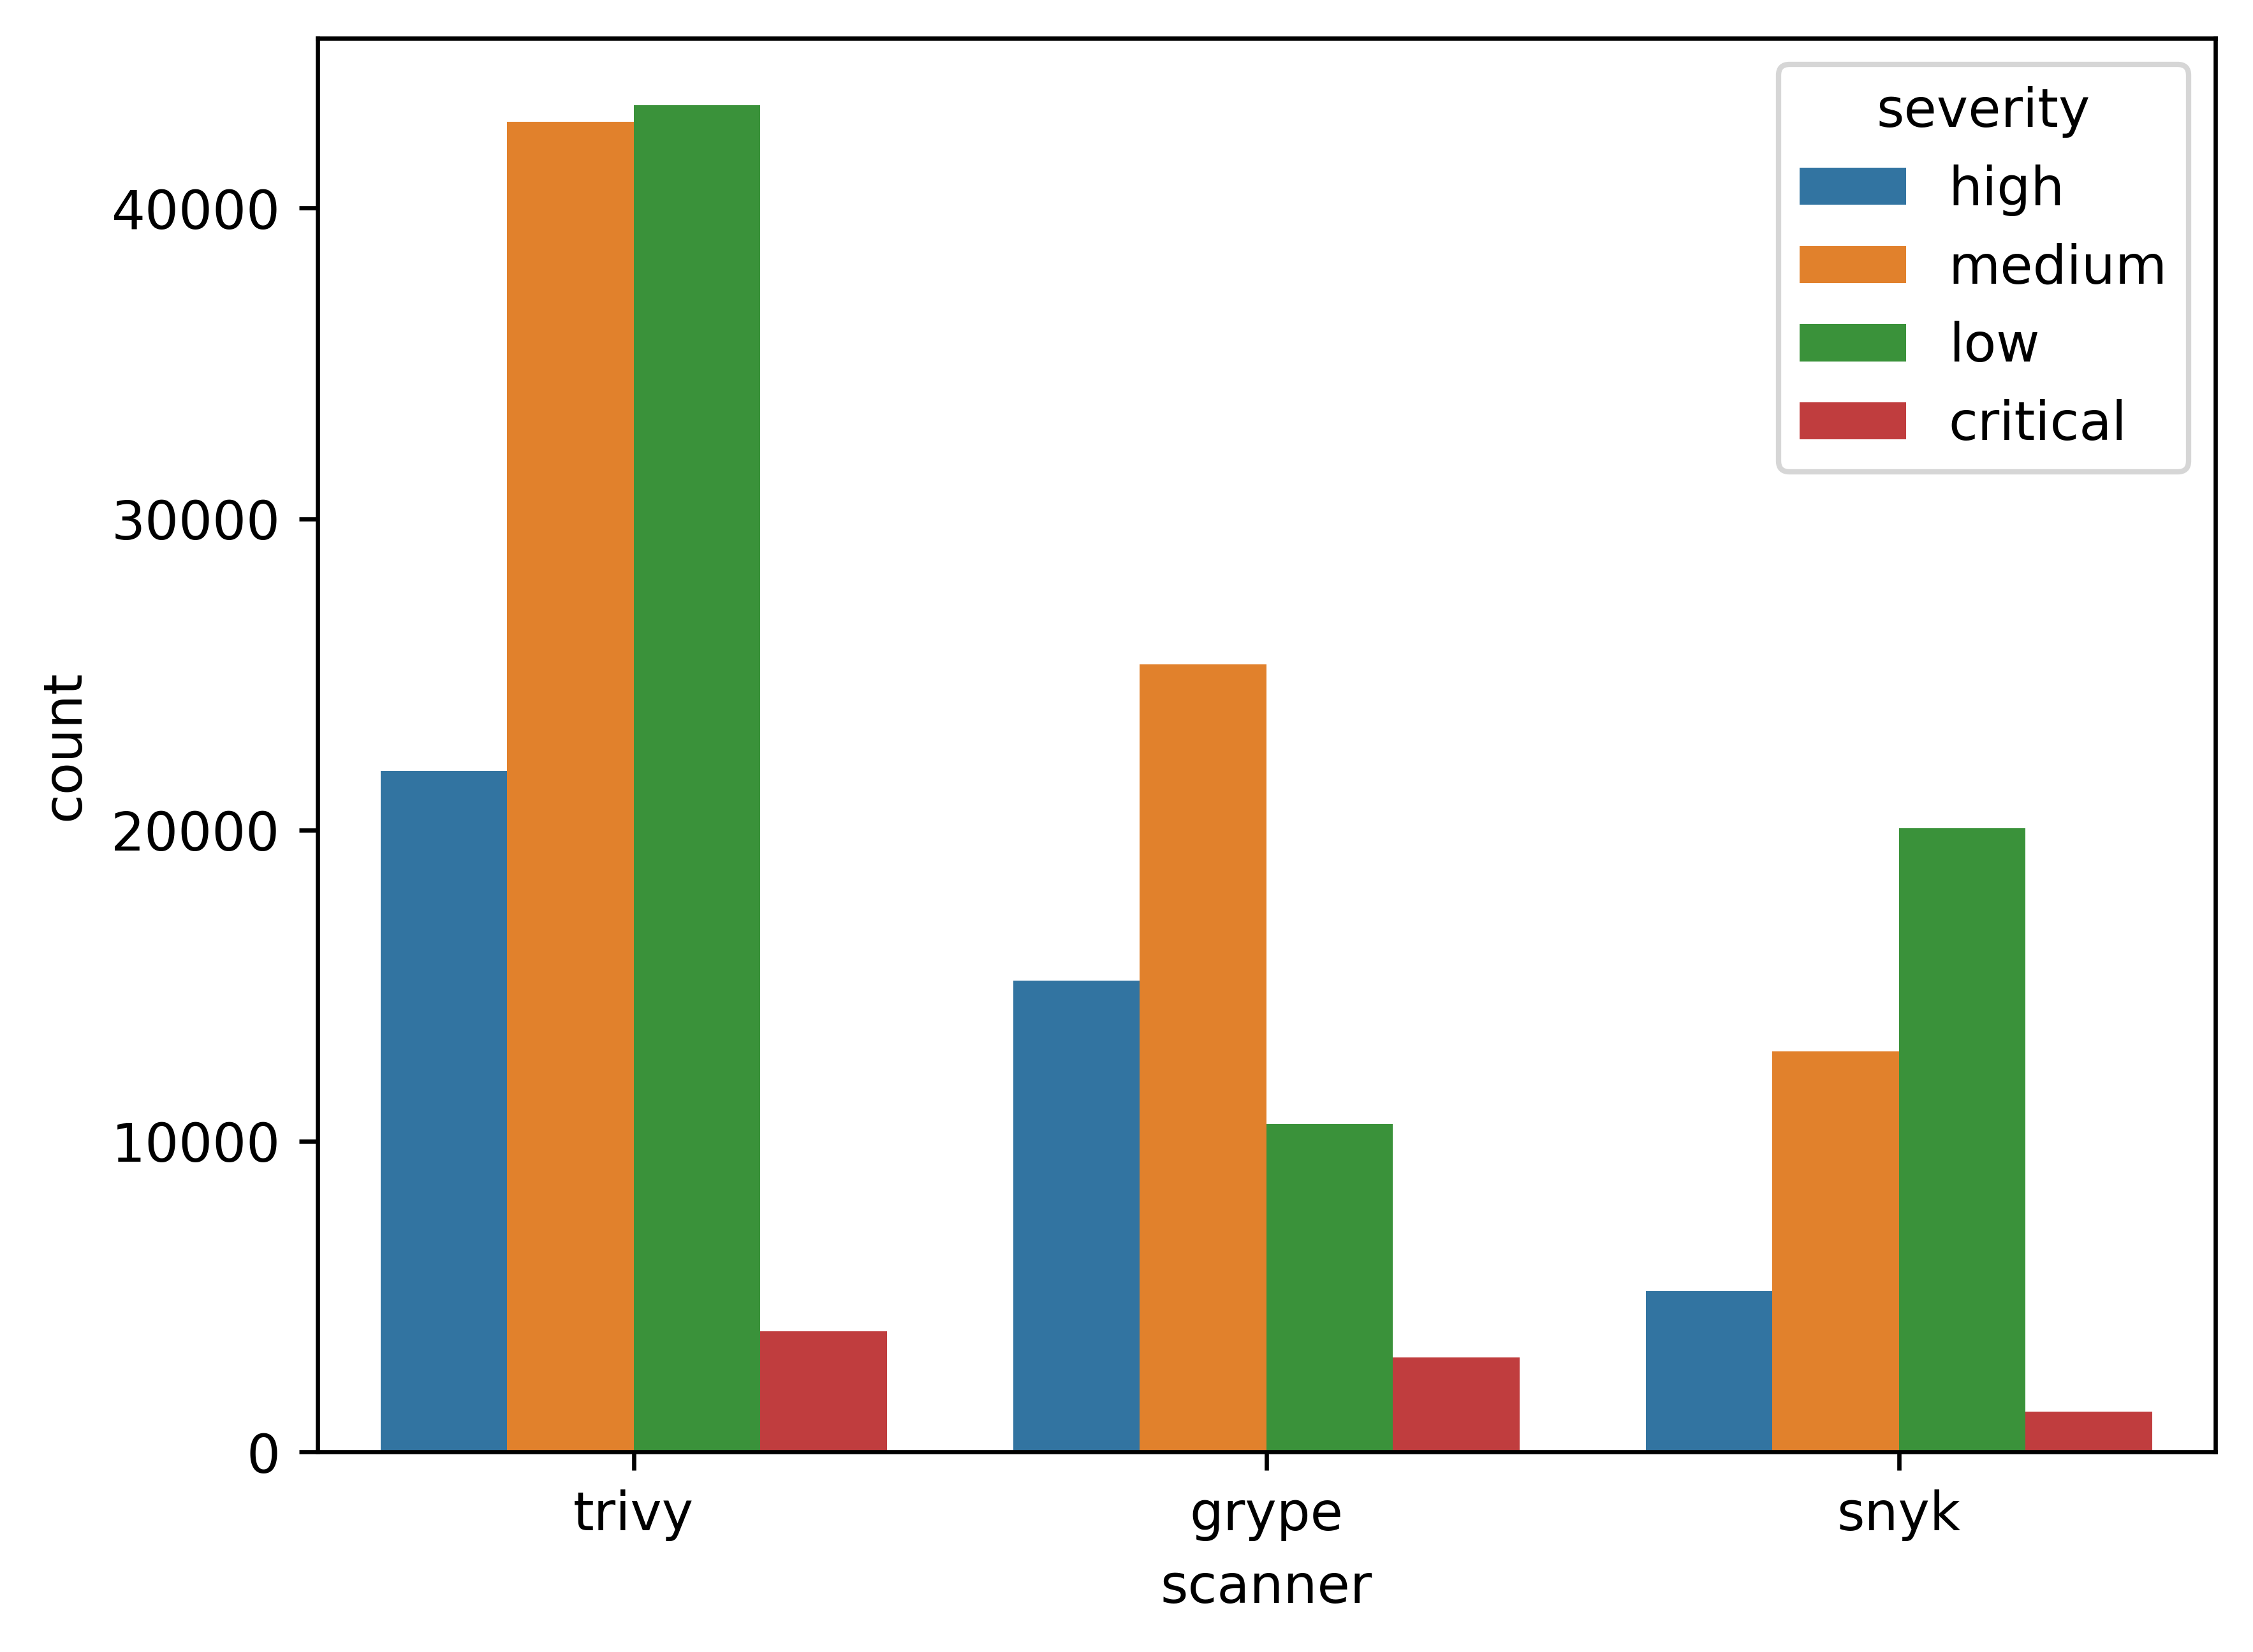

In [6]:
sns.countplot(df, x="scanner", hue="severity")

<Axes: xlabel='severity', ylabel='count'>

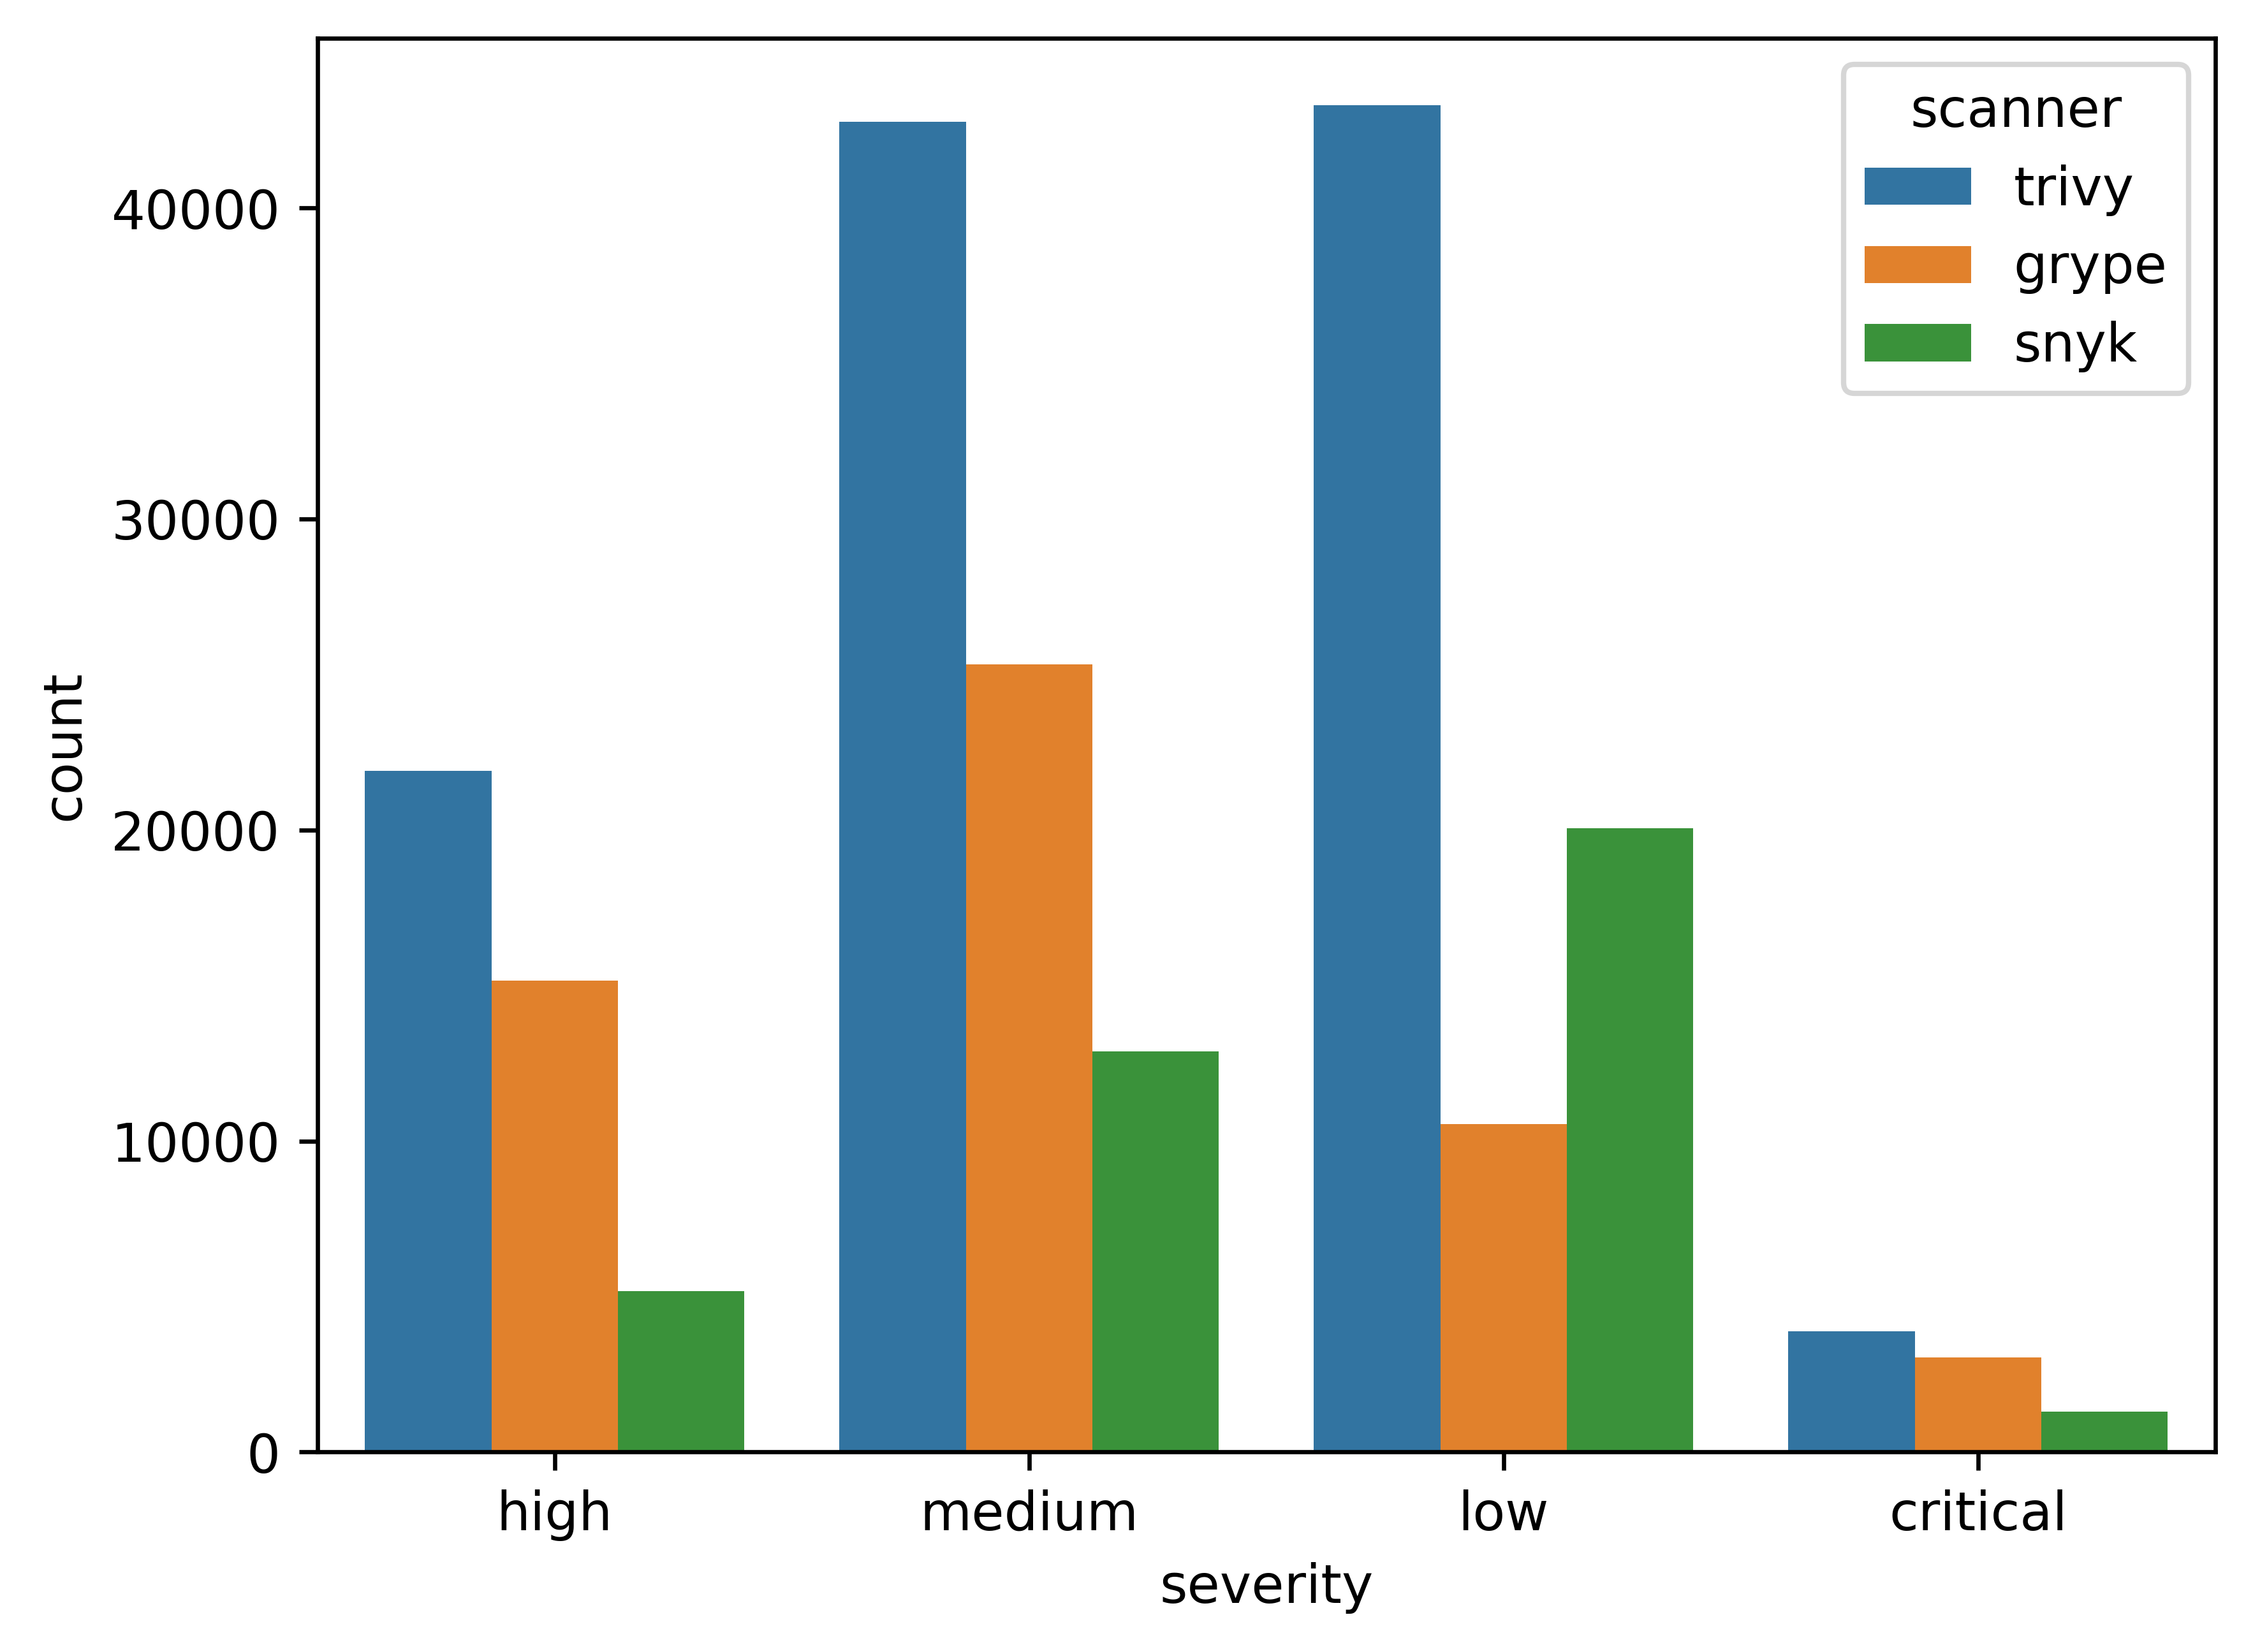

In [7]:
sns.countplot(df[df["severity"].isin(["critical", "high", "medium", "low"])], x="severity", hue="scanner")

<Axes: xlabel='scanner', ylabel='count'>

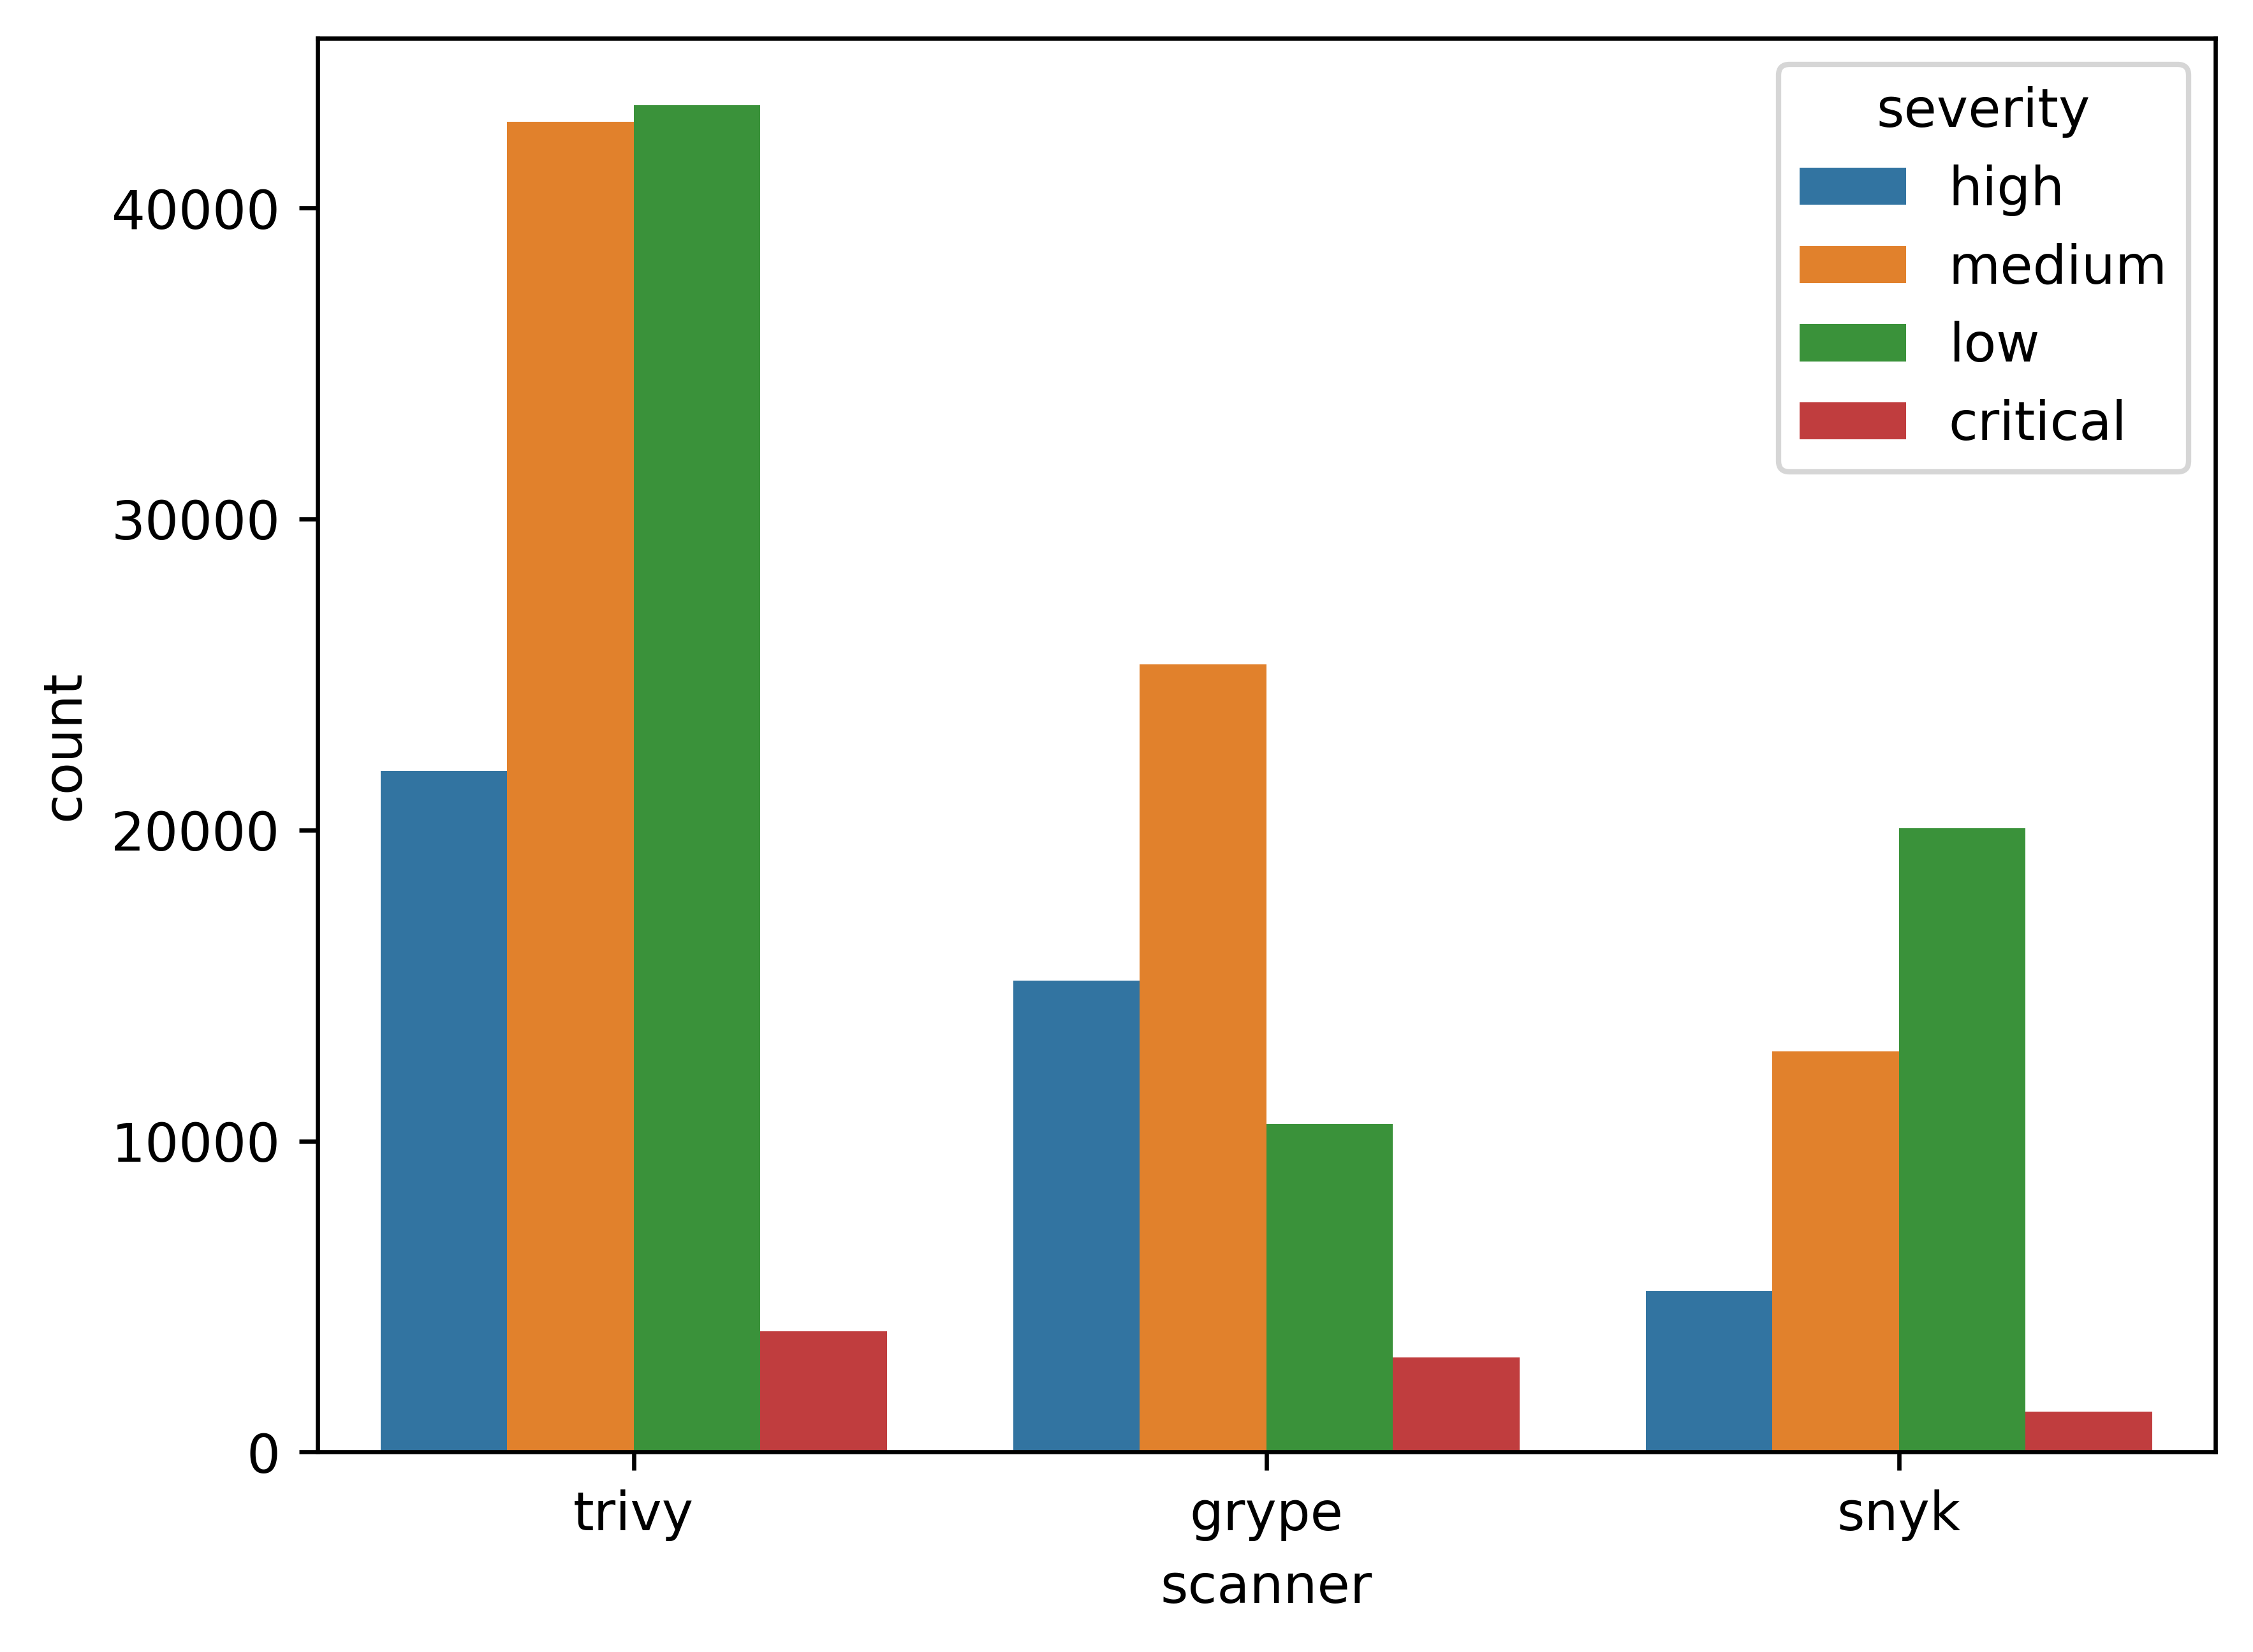

In [8]:
sns.countplot(df[df["severity"].isin(["critical", "high", "medium", "low"])], x="scanner", hue="severity")

In [9]:
trivy_vulns = df[df["scanner"] == "trivy"]
grype_vulns = df[df["scanner"] == "grype"]
snyk_vulns = df[df["scanner"] == "snyk"]

In [10]:
trivy_vulns = trivy_vulns.drop_duplicates()
grype_vulns = grype_vulns.drop_duplicates()
snyk_vulns = snyk_vulns.drop_duplicates()

In [11]:
trivy_uniq_vulns = trivy_vulns[["image", "id", "pkgname", "pkgversion", "severity"]].drop_duplicates()
grype_uniq_vulns = grype_vulns[["image", "id", "pkgname", "pkgversion", "severity"]].drop_duplicates()
snyk_uniq_vulns = snyk_vulns[["image", "id", "pkgname", "pkgversion", "severity"]].drop_duplicates()

Toplamda uniq zafiyetler

In [12]:
vulns = df[["image", "id", "pkgname", "pkgversion", "severity"]].drop_duplicates()

<Axes: xlabel='severity', ylabel='count'>

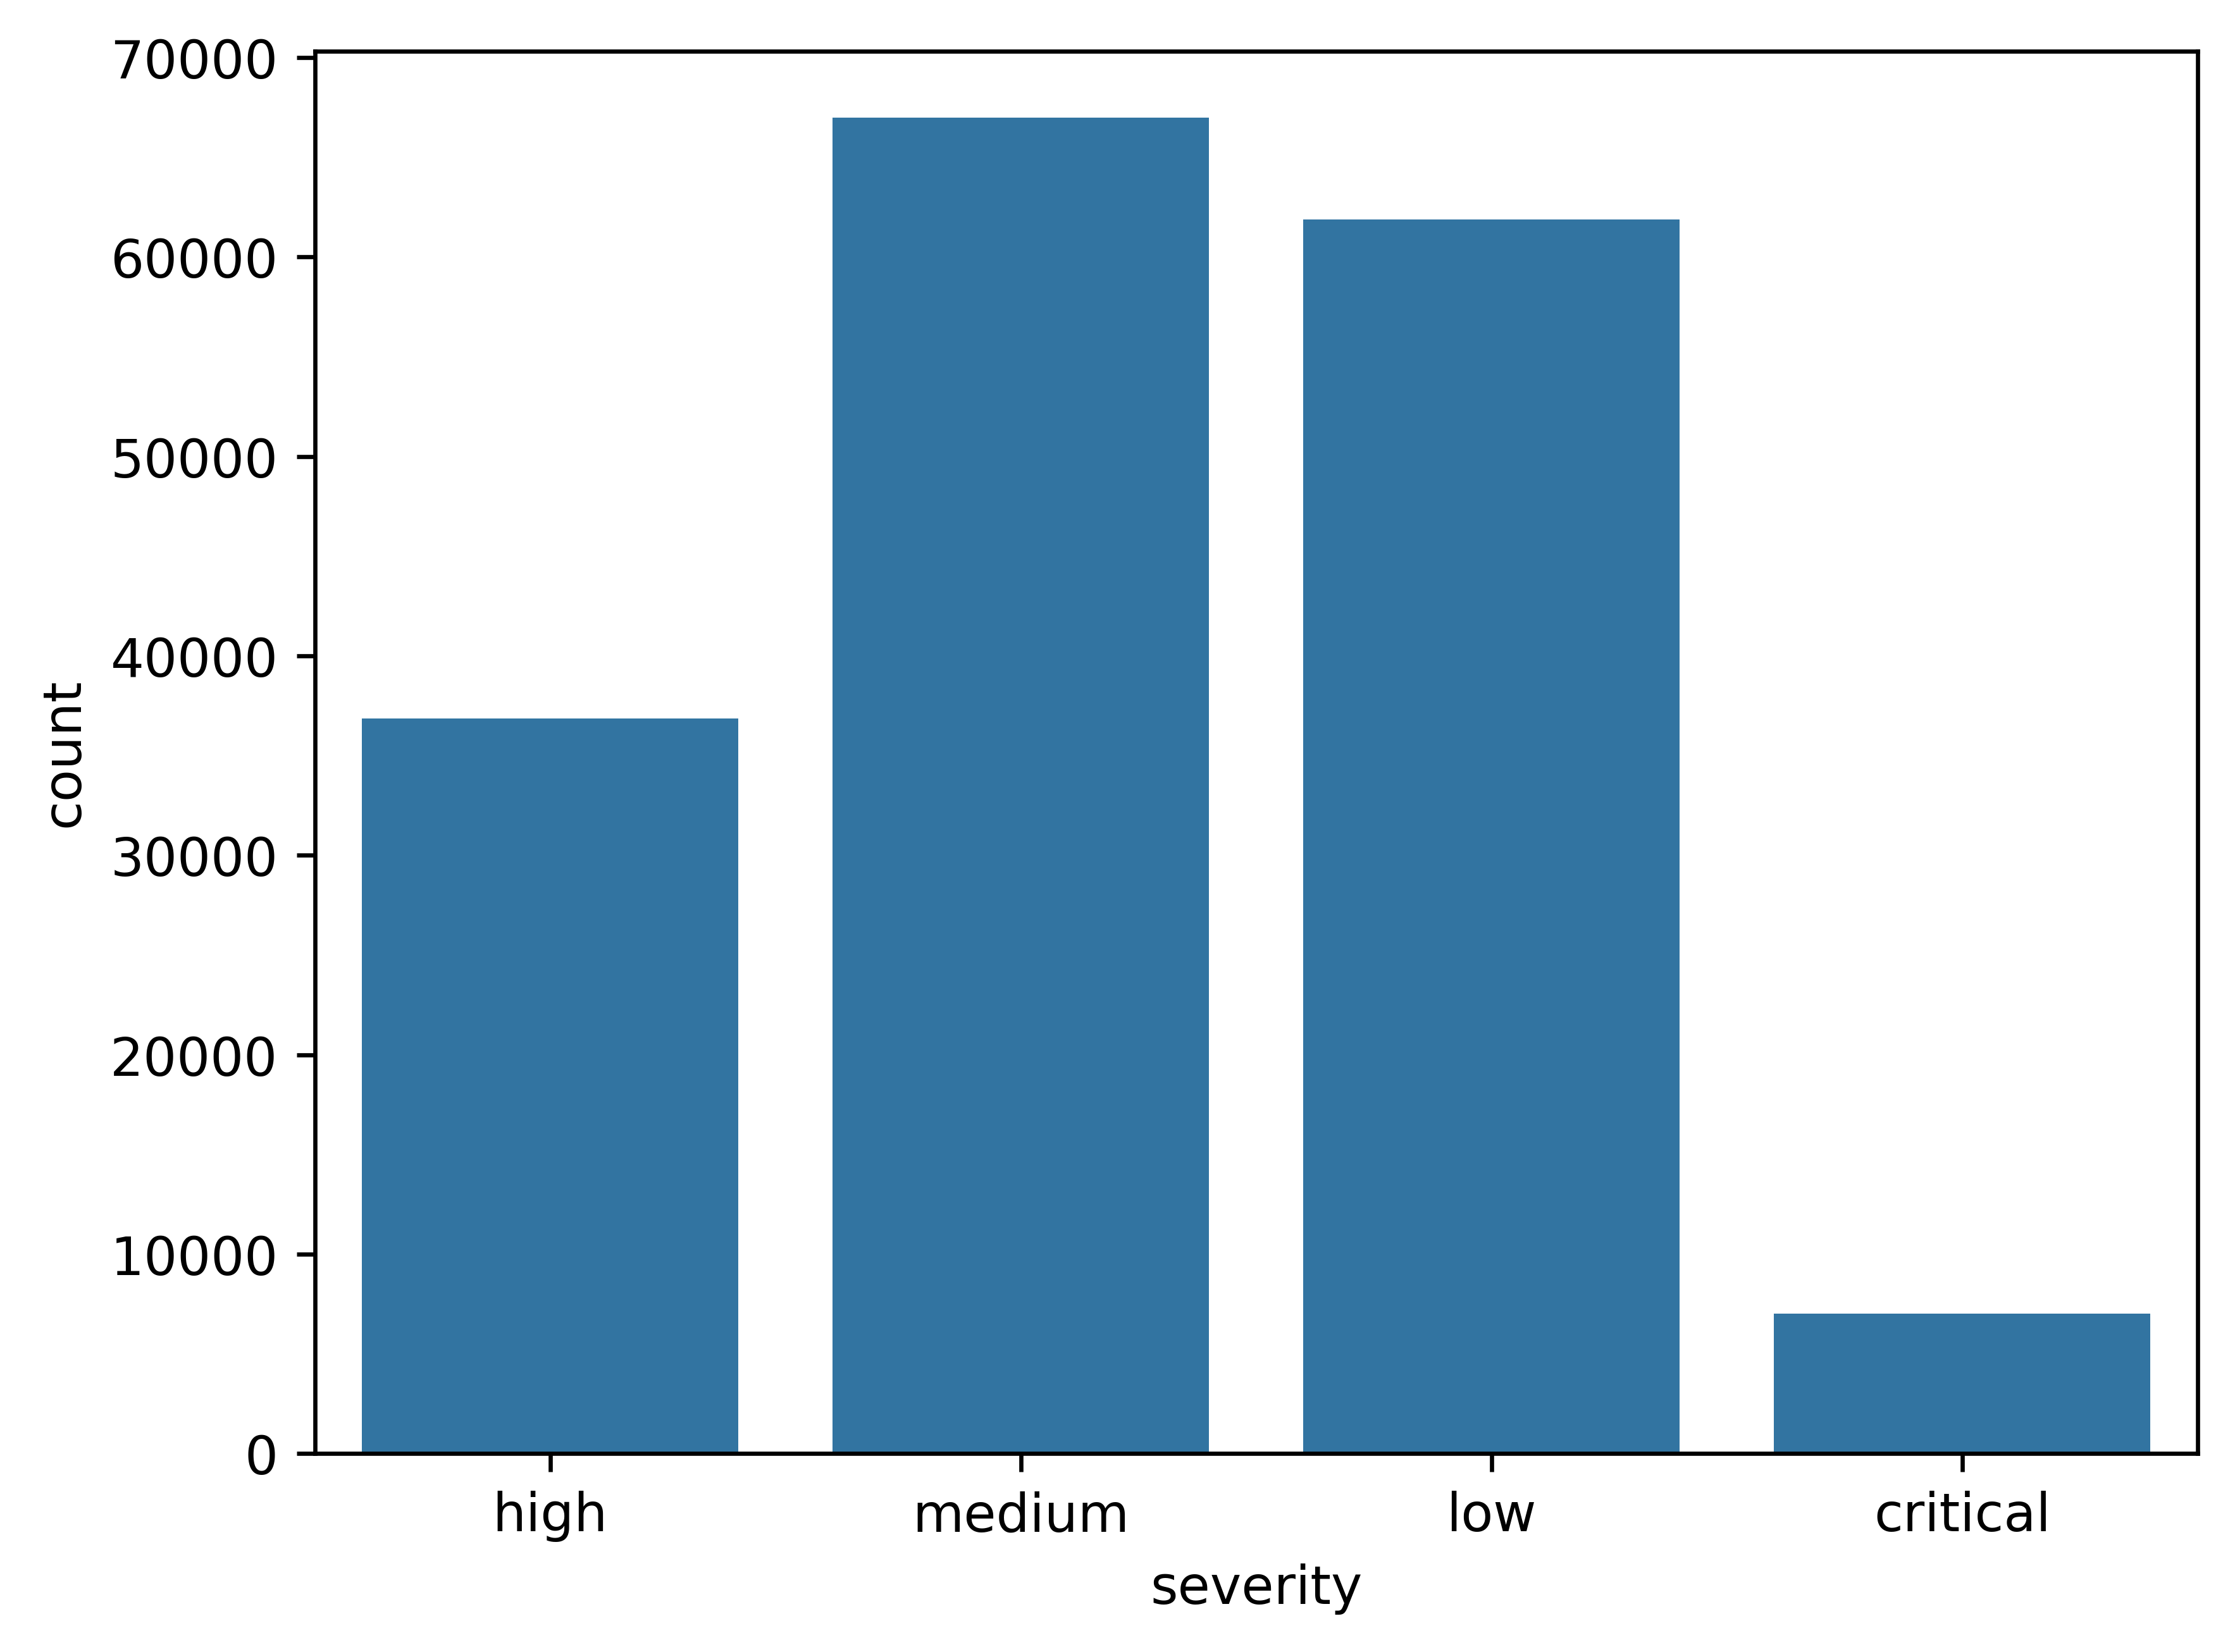

In [13]:
sns.countplot(vulns, x="severity")

Zafiyet istatikstikleri

In [14]:
print(f"Total vulnerability count: {len(vulns)}")
print(f"Trivy Hit: {len(trivy_uniq_vulns)}, Trivy miss: {len(vulns) - len(trivy_uniq_vulns)}")
print(f"Grype Hit: {len(grype_uniq_vulns)}, Grype miss: {len(vulns) - len(grype_uniq_vulns)}")
print(f"Snyk Hit: {len(snyk_uniq_vulns)}, Snyk miss: {len(vulns) - len(snyk_uniq_vulns)}")

Total vulnerability count: 172736
Trivy Hit: 111865, Trivy miss: 60871
Grype Hit: 54099, Grype miss: 118637
Snyk Hit: 39430, Snyk miss: 133306


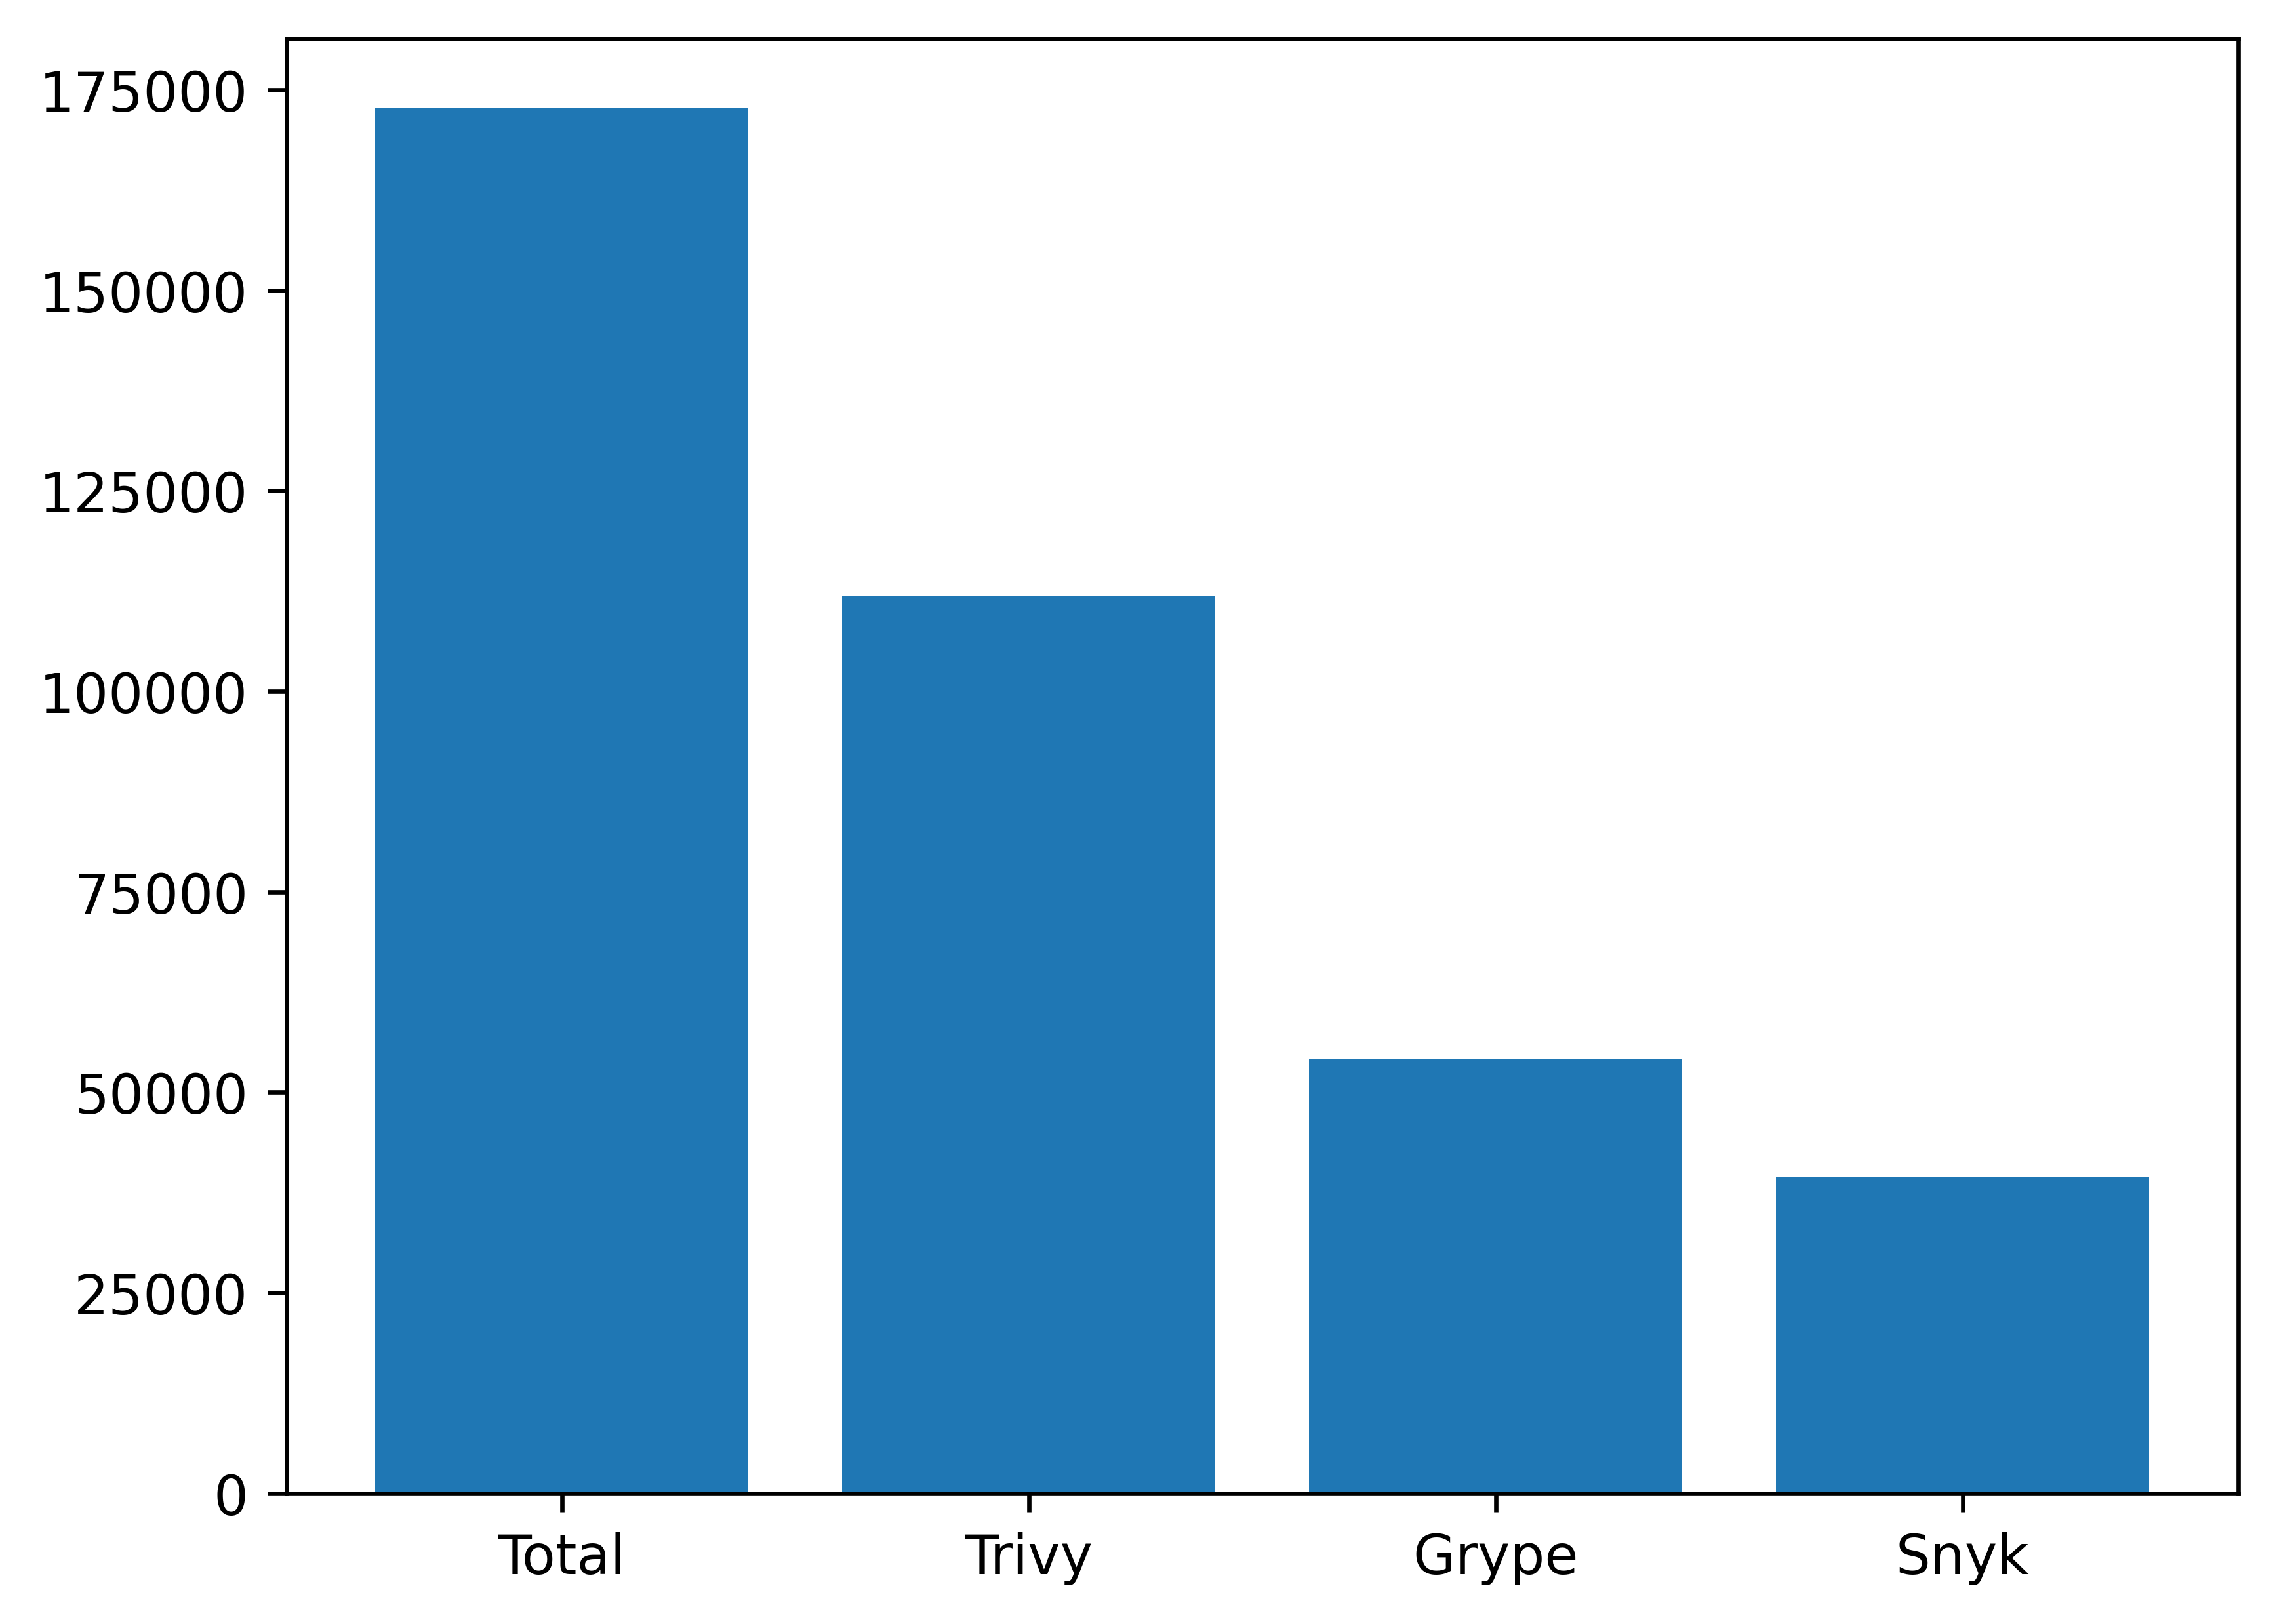

In [15]:
fig, ax = plt.subplots()
scanners = ['Total', 'Trivy', 'Grype', 'Snyk']
counts = [len(vulns), len(trivy_uniq_vulns), len(grype_uniq_vulns), len(snyk_uniq_vulns)]
ax.bar(scanners, counts)
plt.show()